This notebook describes a paper by Terri Kneeland's experiment on the ring game.  You can see Terri's paper at [Identifying Higher Order Rationality](http://terri.microeconomics.ca/research/ecta11983.pdf)  The purpose of her experiment was to estimate how much dispersion there is in subjects 'level of reasoning' - i.e., their ability to reason about other players; reasoning in a game.  

This notebook estimates these levels in a slightly different way than she does in her paper.  The approach here is not meant to dispute any of her conclusions.  Instead, this note is intended to illustrate a number of techniques that are useful much more broadly.

First we'll show how to use some of the features of jupyter notebooks to go through a basic research problem .  You can see how to use use latex to write your arguments formally. We'll use some simple python commands to try to get some insight into the data from her experiment.  We'll use the sagemath kernel in order to do some simple symbolic algebra.

The main point is to illustrate how basic game theoretic logic can be used to provide a structure within which you can 'estimate' the distribution of unknowns within the data.  We'll actually do the estimation as well, so you can see how jupyter notebooks can be used to organize your work.

Much of the analysis in Kneeland's model is based on something called [K-level reasoning](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=3&cad=rja&uact=8&ved=2ahUKEwjgg6n5xqfnAhXHHjQIHfm6CgEQFjACegQIAxAB&url=https%3A%2F%2Fen.wikipedia.org%2Fwiki%2FCognitive_hierarchy_theory&usg=AOvVaw1H-IrhG9DJTd9H-1GhPpNs).  We'll use a very strict interpretation of that model here.  We'll also carry along another type of player we'll call a 'Nash' player.  In Nash equilibrium players best reply to the correct distribution of actions of the other players.  We'll identify a Nash player as a player who best replies to the actual distribution of actions of the other players.


The first thing we'll do is look directly at the data from the experiment.  Thanks here to Terri Kneeland for making the data available. 

The first bit just loads some python libraries (particularly pandas - tons of documentation about it on the internet).  The os library is for reading files.

In [25]:
import pandas as pd
import os
dataset = pd.read_csv('ecma_data.csv')

Now we can look at the dataset.

In [26]:
show(dataset)

Subject  G1P1  G1P2  G1P3  G1P4  G2P1  G2P2  G2P3  G2P4
0         1     1     3     2     3     1     1     2     3
1         2     2     3     2     2     2     3     3     3
2         3     2     1     1     1     1     2     2     2
3         4     3     1     2     2     1     2     2     3
4         5     3     2     2     1     3     1     1     3
5         6     1     2     2     1     3     2     2     3
6         7     1     2     1     1     1     2     3     3
7         8     1     2     1     1     1     2     3     3
8         9     1     2     1     1     1     2     3     3
9        10     1     1     1     1     1     2     1     3
10       11     1     2     1     1     1     1     1     3
11       12     3     2     1     1     1     2     1     3
12       13     3     2     2     2     3     2     2     3
13       14     1     2     1     1     1     2     1     3
14       15     1     2     1     1     1     2     1     3
15       16     1     2     1     1     1     2     1     3
16       17     1     2     1     1     1     2     1     3
17       18     1     2     1     1     1     2     1     3
18       19     1     2     1     1     1     2     1     3
19       20     1     2     1     1     1     2     1     3
20       21     3     1     1     1     3     1     1     3
21       22     3     2     2     1     3     2     2     3
22       23     1     2     1     1     3     2     2     3
23       24     1     2     1     1     3     2     2     3
24       25     1     2     1     1     3     2     2     3
25       26     1     2     1     1     3     2     2     3
26       27     1     1     1     1     1     2     2     3
27       28     1     2     1     1     3     2     2     3
28       29     1     2     1     1     3     2     2     3
29       30     1     2     1     1     3     2     2     3
..      ...   ...   ...   ...   ...   ...   ...   ...   ...
50       51     1     2     1     1     1     1     2     3
51       52     1     2     1     1     1     1     2     3
52       53     1     2     1     1     1     1     2     3
53       54     1     2     1     1     1     1     2     3
54       55     1     2     1     1     1     1     2     3
55       56     1     2     1     1     1     1     2     3
56       57     1     2     1     1     1     1     2     3
57       58     1     2     1     1     1     1     2     3
58       59     1     2     1     1     1     1     2     3
59       60     1     2     1     1     1     1     2     3
60       61     1     2     1     1     1     1     2     3
61       62     1     2     1     1     1     1     2     3
62       63     3     2     1     1     3     1     2     3
63       64     3     2     1     1     3     1     2     3
64       65     1     2     1     1     3     3     2     3
65       66     1     2     1     1     3     3     2     3
66       67     1     2     1     1     3     1     1     3
67       68     1     2     1     1     3     1     2     3
68       69     1     2     1     1     3     1     2     3
69       70     1     2     1     1     3     1     2     3
70       71     1     2     1     1     3     1     2     3
71       72     1     2     1     1     3     1     2     3
72       73     1     2     1     1     3     1     2     3
73       74     1     2     1     1     3     1     2     3
74       75     1     2     1     1     3     1     2     3
75       76     1     2     1     1     3     1     2     3
76       77     1     2     1     1     3     1     2     3
77       78     1     2     1     1     3     1     2     3
78       79     1     2     1     1     3     1     2     3
79       80     1     2     1     1     3     1     2     3

[80 rows x 9 columns]

You can find a brief description of the game that Terri used in her experiment at [https://montoya.econ.ubc.ca/Econ306/terri_experiment.pdf](https://montoya.econ.ubc.ca/Econ306/terri_experiment.pdf).  In the game described in that experiment, each of the lettered actions are replaced by a number, either 1,2 or 3.  For example, when a subject is playing as Player 4 in game 1, the actions k,l,m are replaced by 1,2,3 in the table above. 

Each player in the experiment makes 8 different choices, one is each of the four positions in experiment 1, and again each position in experiment 2.  In the table above the positions are labelled in a simple way, for example G2P2 means the position in which a player was acting as player 2 in game 2, and so on.  The numbers are interpreted as 1- top row, 2 - middle row, 3 - bottom row.  You can see what these mean by clicking on the link above which will show you a picture of the game.



To see how to interpret things, Player 4 in game 1 (G1P4 in the table above) faces a payoff matrix that looks like this:
<table> <tr><td> . </td><td>a</td><td>b</td><td>c</td></tr>
<tr><td>K</td><td>12</td><td>16</td><td>14</td></tr>
<tr><td>L</td><td>8</td><td>12</td><td>10</td></tr>
<tr><td>M</td><td>6</td><td>10</td><td>8</td></tr>
</table>

The labels a, b, and c refer to the actions of player 1. The top row K is represented in the data with the numeral 1, L is 2, M is 3. Now list the columns that are contained in the table so you know how to refer to them.  You use the letters contained between the single quotes.  In the very first line, the player whose label is 1 used action 3 (M), while in the last line of data, the player has label 80, an chose action 1 when playing as player 4. 



In a traditional undergrad game theory class we would go on to 'solve' this game by iteratively deleting dominated strategies.  Player 4 in Game 1 has a strictly dominant strategy - play action 1. Once Player 3 realizes this, he or she should also take action 1 because they expect Player 4 to take play the dominant strategy.  Once player 2 realizes that Player 3 will take action 1 (because they expect player 4 to take action 1), they will respond with action 2.  Similarly Player 1 will take action 1.

We'll call a player who reasons like this a 'solver'.  In Game 1, a solver should use the profile of actions ${1,2,1,1}$.

In the dataframe above, each row represents a profile of actions for each of the two games. So there are 8 columns in the dataframe.  There are 80 subjects, so that makes 80 rows.  If we wanted to check whether the traditional assumption that all players are solvers is right, we could start by checking whether all of the 80 players used the same profile that a solver would.  Of course, what happens in practice is more complicated.  

The dataset you see above is stored in something called a dataframe.  The library, pandas, that was imported above is the one used to analyze them.  A dataframe has named columns.  It is pretty easy too see what they are:

In [27]:
dataset.columns

Index([u'Subject', u'G1P1', u'G1P2', u'G1P3', u'G1P4', u'G2P1', u'G2P2',
       u'G2P3', u'G2P4'],
      dtype='object')

When players are playing game 1 as player 4, they are supposed to take action 1 because it is a dominant strategy.  The first question to ask  of the data is whether they did that. One way to do that is just to draw a bar chart of the data in the column named 'G1P4'.

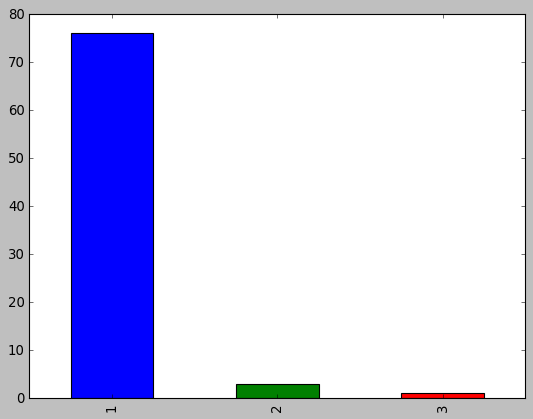

In [28]:
dataset['G1P4'].value_counts().plot(kind='bar')


To get the actual value counts, you do it this way:

In [29]:
ds = dataset['G1P4'].value_counts(normalize=true)
show(ds) 


1    0.9500
2    0.0375
3    0.0125
Name: G1P4, dtype: float64

Or, if you just want the counts themselves, you would do it this way.

In [30]:
dataset['G1P4'].value_counts()

1    76
2     3
3     1
Name: G1P4, dtype: int64

Finally, we get something we can use in game theory.  Subjects are supposed to  use action 1 when they play as player 4.  76  our of 80 (or 95%) actually did that.

This is actually pretty good news because it suggests that the subjects that Kneeland used in her experiment are for the most part interested in making as much money as they can.  We can probably expect them to act the same way as other players, not in the sense that are solvers, but in the sense that they are choosing an action that provides them with the highest expected payment.

On the other hand, since not all players are doing that, it isn't reasonable to expect that each player expects the other players to be solvers.

## Nash Players

Now what we would like to do is to look at subjects acting as Player 3 and calculate the best reply against this empirical distribution.  Theoretically, a Nash equilibrium is supposed to have the property that each player correctly guesses the probablity with which their opponent will take each of his or her possible actions. If $\pi_1, \pi_2$ and $1-\pi_1-\pi_2$ are the probabilities with which subjects in the rest of the group use action 1(k) or 2(1) or 3(m), then we would use the calculation 
$$
20\pi_1 + 14\pi_2 +8(1-\pi_1-\pi_2)
$$ 
to be the expected payoff associated with using action 1(h).  A similar calculation applies to the other two actions 2 and 3 (j or k in the reading).


Now revert to sagemath to do the calculation as follows.

In [31]:
n((76/80)*20+(3/80)*14+(1/80)*8)

19.6250000000000

If you leave out the n() you get the answer as a fraction.  Now we can do the same thing for action i (2):

In [32]:
n((76/80)*16+(3/80)*2+(1/80)*18)

15.5000000000000

Evidently, the best reply to the distribution of actions of the other subjects is the same as the solver's best action, at least when you are playing as Player 3.  The problem is to figure out whether this is true for the Players in the other positions and whether it is true for both games.  Use the sample code here to figure out an answer. 
<hr>
You can change the way a bar chart is displayed.  Here is a way to make it easier to see what is going on.

[Text(73,0,u' 73'), Text(7,1,u' 7')]

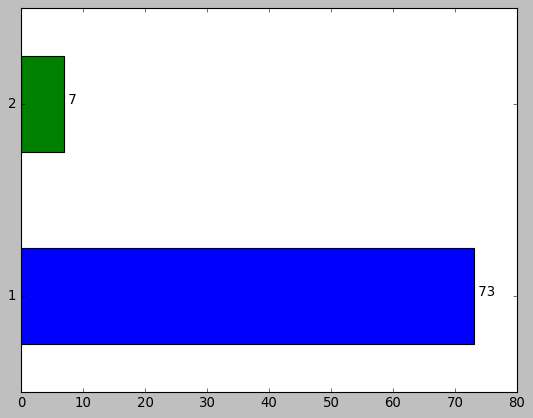

In [33]:
s = dataset['G1P3'].value_counts()
ax = s.plot(kind='barh')
[ax.text(v, i, ' {}'.format(v)) for i, v in enumerate(s)]

[Text(72,0,u' 72'), Text(6,1,u' 6'), Text(2,2,u' 2')]

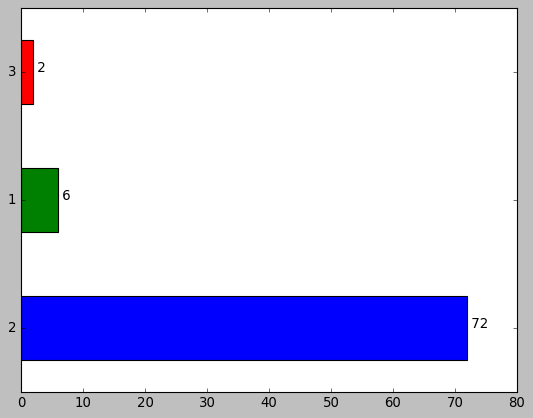

In [34]:
s = dataset['G1P2'].value_counts()
ax = s.plot(kind='barh')
[ax.text(v, i, ' {}'.format(v)) for i, v in enumerate(s)]

[Text(66,0,u' 66'), Text(12,1,u' 12'), Text(2,2,u' 2')]

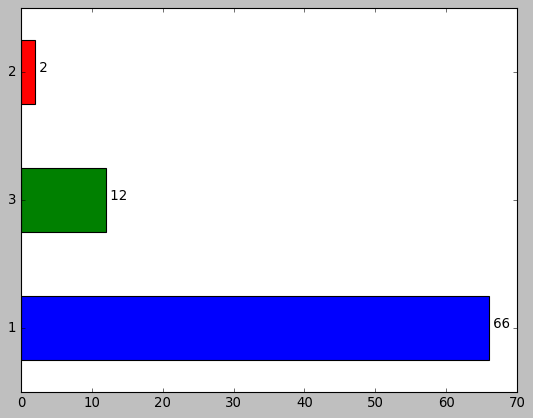

In [35]:
s = dataset['G1P1'].value_counts()
ax = s.plot(kind='barh')
[ax.text(v, i, ' {}'.format(v)) for i, v in enumerate(s)]

Using the counts from these charts, it is easy to calculate that a Nash player will do the same thing as a solver in Game 1, no matter which player they are.

# Structural Estimation 1

We can break the game down into two parts.

The first part consists of a list of 'types' for the players.  A type describes everything we need to know about a subject to understand how they find their best reply.  This would typically include their payoffs (though in the game here, we'll assume all payoffs are the same) and their beliefs about the actions of the other players.

The second part is the probability distribution over these types, which we'll try to estimate.

We already have two possible types, solvers and Nash players.  At least in game 1, we can't tell them apart.  Yet some subjects are neither solvers nor nash players since they choose a dominated action.  When we add the results from Game 2 to the mix, there will be a lot more behavior
In Game 1, Nash players and solvers behave the same way.  Neither of them is supposed to choose anything other than the dominant action as Player 4, but not all of them do.  So we'll need to add some more types to account for the data.

The theory that Kneedland uses involves someting called 'levels of reasoning', casually referred to as the level-K model. The level-K model starts with some level 0 subject who play randomly.  Here we'll assume that they randomize with equal probability among all three of their actions in each game. Level 1 subjects believe that all other players are level 0 players, which means their beliefs are 'wrong'.  Level 2 subjects believe that all other players are level 1 players.  This is wrong as well, but their beliefs would be correct if all other players were actually level 1 players.  Generally, level k subjects believe that all other subjects are level k-1.  As will be seen, all subjects with levels higher than 3 behave the same way that the level three player does, so we can't tell them apart. 

We'll estimate the probabilities with which each subject has each level along with the probability that a subject is a Nash player.  That is $\rho_0$, $\rho_1$, $\rho_2$, $\rho_3$ and $\rho_n$. 



What makes this somewhat complicated is that a level $i$ subject has to predict what a level $i-1$ subject will do as each player in the game.  To figure out what a level $i-1$ subject will do, you need to figure out what a level $i-2$ subject will do, and so on.  Terri's experiment keeps that all manageable.

It is also a really nice introduction to the general topic of what is called 'higher order uncertainty' which is certainly a feature of experimental game theory.  A player in a game has higher order uncertain if he or she believes their opponent is rational, but is uncertain whether their opponent understands that they themselves are rational.

In any case, the next step is to work out what subjects of each level 1,2, or 3 and above will do as each player in the game.  To start off, I'll shorten things by using only Game 1 and its outcomes. Then when the method is clear we can go on to use all the data from both games.


In game 1, a level $0$ subject is expected to randomize with equal probability across all his or her actions.  This is supposed to be true no matter what player they are. All other levels of subject are expected to see that action 1 is a dominant strategy as player 4. 

In the bar chart above we saw that only 5 of the 80 subjects played something other than the dominant action 1.  This suggests that $\rho_0$  is quite small.

Now we can do some quick reasoning. Level 1 subjects playing as Player 4 are expected to choose the dominant action 1.  Subjects with a level greater than 0 are all expected to choose the dominant action as well.  Which means that level 2 and higher subjects as player 3 (again focussing only on game 1) choose the best reply 1 to the dominant action 1.

Then working back through the players, subjects of level 2 and higher will best reply to their opponents best reply.  This is just like Nash equilibrium.  

For a level 1 subject playing as Player 3, just calculate the expect payoff to each of the 3 possible actions.

$$
20(\frac{1}{3})+14(\frac{1}{3})+8(\frac{1}{3})
$$

for action  2:
$$
16(\frac{1}{3})+2(\frac{1}{3})+18(\frac{1}{3})
$$

and action 3:
$$
0(\frac{1}{3})+16(\frac{1}{3})+16(\frac{1}{3})
$$
You don't really need any software to see that action 1 is best, but here is the calculation anyway:

In [36]:
show (n(20/3+14/3+8/3))
show (n(16/3+2/3+18/3))
show (n(0/3+16/3+16/3))

14.0000000000000

12.0000000000000

10.6666666666667

The implication is that a level 1 subject as player 3 will choose action 1, which is the action suggested by deleting dominated strategies, except that it is chosen here for a very different reason.

Just to illustrate another technique you can use with sagemath, we could imagine a player who believes that level 0 subjects exist who randomize equally among all their actions.  Otherwise, they have figured out that all the higher level subjects will use the dominant action as player 4 (in game 1).  If such a player believes that their opponent is a level 0 subject with probabiity $\rho$, then we can figure out their best reply like this:

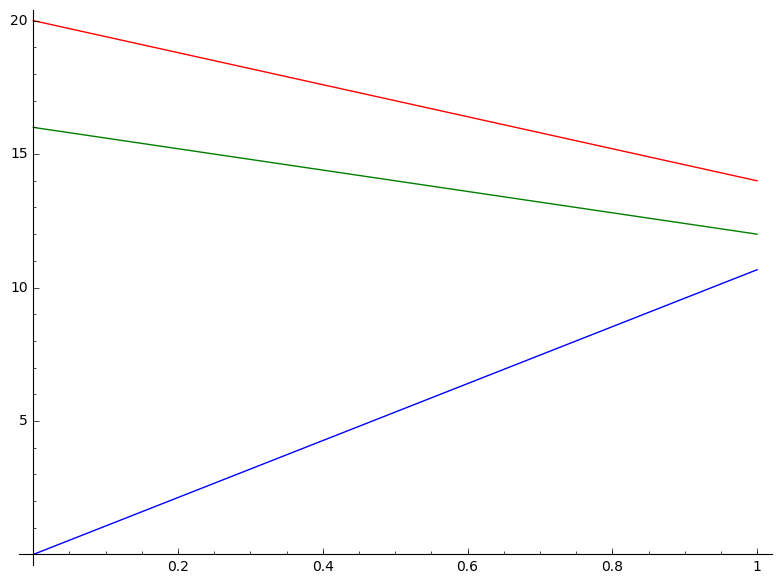

In [37]:
def prof1(rho):
    return 20*(1-rho)+rho*42/3
def prof2(rho):
    return 16*(1-rho)+rho*36/3
def prof3(rho):
    return rho*32/3
p1 = plot(prof1(x),(x,0,1),color="red")
p2 = plot(prof2(x),(x,0,1),color="green")
p3 = plot(prof3(x),(x,0,1),color="blue")
p1+p2+p3

The plots show the expected payoffs for each of the three actions available to player 3 in game 1 for all possible values of $\rho$.  What the pictures show is that choosing action 1 (the red line) as player 3 always has a higher payoff that either of the other two actions.  This is even true if this player believes his opponent is level 0 with probability 1.

Now we can go a bit faster.  As player 2, a level one player evaluates payoffs as $\frac{36}{3}$ for 1, $\frac{42}{3}$ for action 2, and $\frac{34}{3}$ for action 3.  From this we get that a subject of level 1 plays action 2 as player 2. 

Similarly, when a level 1 subject is playing as Player 1 (in game 1), she believes player 2 will randomize among all three actions equally.  So the payoff is $\frac{40}{3}$ for action 1, $\frac{24}{3}$ for action 2 and $\frac{36}{3}$ for action 3.

Summing it all up, in Game 1, a subject of level 1 should take the actions ${1,2,1,1}$.  For game 1, that is the same thing that you would get by deleting dominant strategies (though you'll see changes in this regard when we add the actions from Game 2).

Now that we know what a level 1 subject will do as each player in game 1, we can figure out what a level 2 subject would do, because level 2 thinks he is playing against level 1.  As player 4, they play the dominant action 1.  As player 3 they best reply to the dominant action and choose 1.  As player 2 they best reply to action 1 by player 3, and choose 2.  Finally as player 1, they best reply to action 2 (which is what player 1 does as player 2) and choose 1.

So a level 2 player uses the profile of actions ${1,2,1,1}$.  Notice that we just argued that when a level 1 subject uses the profile ${1,2,1,1}$, then a level 2 must use the profile.  No matter what level $k$ a subject has, she expects her opponent to be level $k-1$, which means that a level $k$ subject will use the profile ${1,2,1,1}$ if she expects the level $k-1$ player to use it.  It then follows by induction that players of every level higher than $0$ will use the profile ${1,2,1,1}$ in game 1. 



Now we can illustrate how we would use the model to estimate the value of $\rho$.  If we see any profile of actions in game 1 other than ${1,2,1,1}$, we know the subject is level 0.  However, the level 0 subject will sometimes choose the profile ${1,2,1,1}$ as well.  This probability is easy to calculate so far - it is the probability she uses action 1 as player 1 and the action 2 as player 2 and .... . In other words
$$
\frac{1}{3^4}
$$
This calculation is based on the assumption that a level 0 player's actions are independently chosen in the various positions, which is an assumption in this theory.  Keep in mind that when we are 'estimating' parameters like $\rho_0$, what we get is a value that is based on the underlying theoretical model we use to explain the data.

This is true in all estimation problems in economics.  Even a simple regression assumes the underlying data is related in a linear way.

In any case, what does it mean to 'estimate' $\rho_0$.  Our assumptions suggest that 


Subject 7 in the dataframe at the top of this page chooses all the correct actions in both games.  This can happen because the subject has a level higher than $0$ or because the subject is level 0 and randomly choses the correct actions.  So the probability of seeing this profile is
$$
(1-\rho)+\rho(\frac{1}{3^4})
$$

Denote a row in the data frame as $r$ while the collection of all the rows is $R$.  Let $R_1$  be the set of rows where the 'correct' action is taken n every game, with $R-R_1$ being its complement.  Then the probability of observing the data from Terri's experiment is
$$
\prod_{r \in R_1}(1-\rho)+\rho(\frac{1}{3^4})\cdot\prod_{r\in R-R_1}\frac{1}{3^4}
$$

You can no doubt see from this that the probability of seeing any particular collection of rows is very small.  However, we can still estimate $\rho$ by asking which value makes the probability of the observed sample highest.



Doing this directly is going to involve some pretty small numbers, so lets do it indirectly.  First lets define $\pi$ to be the probability with which we think a subject will get all the actions 'right' in our theory.  Formally,
$$
\pi=(1-\rho)+\rho(\frac{1}{3^4})
$$

The probability that a subject gets one or more actions wrong is $1-\pi$.  We'll try to estimate $\pi$ instead of estimating $\rho$ directly. Then each row is a single observation which is a success with probability $\pi$, i.e., we are dealing with a binomial distribution of outcomes.

The binomial distribution gives a formula for the probability with which you'll have $m$ successes (subjects do the right thing) in $n$ trials.  The binomial formula is
$$
\frac{n!}{m!(n-m)!} {\pi}^m (1-\pi)^{(n-m)}
$$


The formula we want isn't the binomial per se, it is the probability we would get the set of outcomes we actually observed in the experiment.  This is given by the simpler formula
$$
{\pi}^m (1-\pi)^{(n-m)}
$$
To use this formula, we just have to figure out what to use for $m$ and $n$.  There are 80 subject, so that gives us $n$. Now we just have to figure out how many of them played 'correctly' in game 1.  Lets do this using a little python pandas:

In [38]:
seriesObj = dataset.apply(lambda x: True if x['G1P1'] == 1 and x['G1P2'] == 2
                          and x['G1P3'] == 1 and x['G1P4'] == 1
                          else False, axis='columns' )
numOfRows = len(seriesObj[seriesObj == True].index)
print(numOfRows)

62


What this says is that 62 of the 80 subjects did the right thing in Game 1.  This makes the probablity of the sample equal to ${\pi}^{62} (1-\pi)^{(18)}$. We need to figure out what value of $\pi$ will make this probability largest. Once once we do that, we can figure out what the best estimate of $\rho$ is.

In [39]:
var('pi')
Prob = pi^62*(1-pi)^18
dProb = diff(Prob,pi)
show(dProb)
solve(dProb,pi)

62*(pi - 1)^18*pi^61 + 18*(pi - 1)^17*pi^62

[pi == (31/40), pi == 0, pi == 1]

The value of $\pi$ that maximizes the probability of seeing the observed outcomes is 31/40, which is the same as 62/80.  Now we can find the value of $\rho$  that makes $\pi=\frac{62}{80}$. 

In [40]:
var('rho')
solve((1-rho)+rho*(1/(3^4))==62/80,rho)

[rho == (729/3200)]

This computation says that the best estimate of the probability with which a randomly chosen player will have level 0 is just a bit less that $\frac{1}{4}$.

So far, we have left out all the data from Game 2.  If you look closely at the two payoff tables, the only difference between game 1 and 2 is that row 1 and 3 have been interchanged, so that the dominant strategy for player 4 becomes 3 instead of 1.  Subjects of level 1 will switch their choice from 1 to 3 as Player 4. Yet they will continue to believe that their opponent is level 0 and will randomize with equal probablity.  As a consequence, since their payoffs are the same in game 2 as they are in game 1, they will do the same thing as they did in Game 1. In other words, they play action  1. Similar reasoning says they will make the same choices as player 1 and 2 as they did in Game 1 for the same reasons. So level 1 players use the pattern 1,2,1,3 in Game 2 and over both games they should use the pattern 1,2,1,1,1,2,1,3.  What that means exactly is that if you look at a row in the dataframe at the top and you want to check whether they player is level 1, you should look for the pattern 1,2,1,1,1,2,1,3.



Level 2 players believe their opponents are level 1 players.  As such, they believe that as Player 3, their opponent will pick 3 meaning that they should switch to action 2.  Now a level 2 subject plays differently from a level 1 subject.  As Player 2, the best reply to their belief that Player 3 is level 1 and they will best reply to action 1 as it was in game 1.  Similarly as Player 1 they'll best reply to action 2 which is what they expect a level 1 player to choose.  So their pattern would be 1,2,1,1,1,2,2,3.

Level 3 subjects expect level 2 opponents, so they choose 3 as player 4, 2 as player 3, so far looking exactly like a level 2 player.  As player 2 they expect a level 2 opponent as Player3.  The level 2 player chooses 2 as Player 3, so the level 3 player best replies to that by choosing 1, as does any higher level subject.  Finally, as Player 1 a level 3 subject expects a level 2 opponent as Player 2 and a level 2 Player 2 plays 2 as we figured out in the previous paragraph.  The best reply to action 2 by player 2 is action 1.  So a level 3 subject has pattern 1,1,2,3 in Game 2 and 1,2,1,1,1,1,2,3 overall.

Notice how nicely Terri's experimental design separates types 1, 2 and 3.

For a level 4 player, we can pick actions by referencing the previous patterns.  As Player 4 they choose 3.  As Player 3 they best reply to 3 by choosing 2.  As player 2 they best reply to action 2 by Player 3 and choose 1, as player 1 they best reply to 1 and choose 3, so their pattern is 1,2,1,1,1,1,2,3, so players 3 and higher all look the same.

At this point we'll just pause for a moment to do a brief theoretical exercise.  We just showed that if a subject of level 3 chooses the pattern ${1,2,1,1,1,1,2,3}$, then a subject of level 4 will do the same thing.

I think you can see that since each subject believes the others are exactly one level lower, we could use exactly the same argument to show that if a subject of level $k-1$  uses the profile of actions ${1,2,1,1,1,1,2,3}$ then a level $k$ subject must do the same thing.

This gives us an inductive proof that all levels above 3 play the same way. So having a very large number of levels in this case doesn't make you play like a player who deletes dominated strategies.  In other words, no level $k$ player with this formulation will play as if they were deleting dominated strategies.


Now we have 3 distinct patterns, 1,2,1,1,1,2,1,3 then 1,2,1,1,1,2,2,3 then 1,2,1,1,1,1,2,3.  We can use pandas again to count them.

In [41]:
seriesObj = dataset.apply(lambda x: True if x['G1P1'] == 1 and x['G1P2'] == 2
                          and x['G1P3'] == 1 and x['G1P4'] == 1
                          and x['G2P1'] == 1 and x['G2P2'] == 2
                          and x['G2P3'] == 1 and x['G2P4'] == 3
                          else False, axis='columns' )
numOfRows = len(seriesObj[seriesObj == True].index)
print(numOfRows)

7


In [42]:
seriesObj = dataset.apply(lambda x: True if x['G1P1'] == 1 and x['G1P2'] == 2
                          and x['G1P3'] == 1 and x['G1P4'] == 1
                          and x['G2P1'] == 1 and x['G2P2'] == 2
                          and x['G2P3'] == 2 and x['G2P4'] == 3
                          else False, axis='columns' )
numOfRows = len(seriesObj[seriesObj == True].index)
print(numOfRows)

12


In [43]:
seriesObj = dataset.apply(lambda x: True if x['G1P1'] == 1 and x['G1P2'] == 2
                          and x['G1P3'] == 1 and x['G1P4'] == 1
                          and x['G2P1'] == 1 and x['G2P2'] == 1
                          and x['G2P3'] == 2 and x['G2P4'] == 3
                          else False, axis='columns' )
numOfRows = len(seriesObj[seriesObj == True].index)
print(numOfRows)

14


A Nash player is supposed to best reply to a belief about the distribution of actions of his opponents that that is 'correct'.  This is complex because the rational player now has beliefs about how likely it is that his opponents are level 0, 1, etc.  She may also believe that some of the other players are fully rational.  To figure out what she should do, she needs to figure out not only how likely it is that the other players are rational, but also what the other rational players will do.

To proceed with this, lets use the Nash identifying assumption.  If a Nash player is best replying to a correct belief then, then whatever he or she does should be a best reply to the realized distribution of actions in the experiment.  The realized actions are random, and we can't know exactly their distribution.  We are hoping that with 80 players, the realized distrbution will be close to the unobserved true distribution.   So we can start by finding the distribution that a Nash player is supposed to best reply to:

In [44]:
ds = dataset['G2P4'].value_counts(normalize=true)
show(ds) 
ds = dataset['G2P3'].value_counts(normalize=true)
show(ds) 
ds = dataset['G2P2'].value_counts(normalize=true)
show(ds) 



3    0.9875
2    0.0125
Name: G2P4, dtype: float64

2    0.7875
1    0.1625
3    0.0500
Name: G2P3, dtype: float64

2    0.475
1    0.475
3    0.050
Name: G2P2, dtype: float64

Now it is easy enough to work out a pattern. Pretty much everyone choose action 3 in Game 4.  A rational player will certainly do that, then respond with action 2 as Player 3 since he ought to believe that action 3 is very likely to be the action of his opponent.  

As player 2 an Nash player should best reply to a strategy by his or her opponent that plays action 2 with probability .79, action 1 with probability .16, and action 3 with probability .05. A quick computation will show you that the best reply to this belief is action 1.  

Finally as player 1, the Nash player would expect action 1 and 2 to be played with the same probability .475, while action 3 would be played with probability .05.

The best reply is 3 (which is the strategy associated with deletion of dominated srategies.  Using the same argument for Game 1 indicates that a Nash player plays like one who deletes dominated strategies.   We can count players who are likely to be rational players:

In [45]:
seriesObj = dataset.apply(lambda x: True if x['G1P1'] == 1 and x['G1P2'] == 2
                          and x['G1P3'] == 1 and x['G1P4'] == 1
                          and x['G2P1'] == 3 and x['G2P2'] == 1
                          and x['G2P3'] == 2 and x['G2P4'] == 3
                          else False, axis='columns' )
numOfRows = len(seriesObj[seriesObj == True].index)
print(numOfRows)

13


All this seems to suggest that the players can be divided the way Terri suggest as follows:
<table><tr><td>Level 1</td><td>Level 2</td><td>Level3 or higher</td><td>Nash</td></tr><tr><td>7</td><td>12</td><td>14</td><td>13</td></tr></table>

This is roughly consistent with Terri's interpretation, except that we have more than half the subjects left over as level 0 subjects.  Also our identification isn't exact - each of the players who look rational, for example, may just be level 0 players who chanced upon the right combination of actions.  Since there seem to be a lot of level 0 players, we'll need to take account of this.

Another way to put it is that our model explains less than half the data from the experiment even if we allow for Nash players (which isn't part of the level $k$ theory).



So lets proceed to see what can be done about estimation. We have bunch more parameters now, $\rho_0$ as always represents the probability with which players are level $0$.  Now we have level 1,2,3 and up along with rational players to account for.  So add parameters $\rho_1$, $\rho_2$, $\rho_3$ and $\rho_r$  to the mix.  

As before, we want to specify specific profiles of actions as 'successes' and use that approach to estimate the underlying probabilities $\rho_i$.  The distribution we want is one called a multinomial distribution.  Unlike the binomial there are a number of 'successes' now defined by the different patters 1,2,1,1,1,2,1,3 then 1,2,1,1,1,2,2,3 then 1,2,1,1,1,1,2,3 and 1,2,1,1,3,1,2,3 for level 1, level 2, level 3 and above and the rational pattern. Let $$\pi_1=\rho_1+\rho_0\frac{1}{3^8}$$ be the probability that the level 1 pattern is played, $$\pi_2=\rho_2+\rho_0\frac{1}{3^8}$$ be the probability the level 2 pattern is played, $$\pi_3=\rho_3+\rho_0\frac{1}{3^8}$$ be the probability the level 3 pattern is played, and finally $$\pi_r=\rho_r+\rho_0\frac{1}{3^8}$$ be the probability the rational pattern is played.  All other patterns are lumped together and are played with probabiliy $$1-\pi_1-\pi_2-\pi_3-\pi_r$$



The data is a collection in which there are 7,12,14,13 and 54 patterns of each type.  The probability of a realized data set like this is
$$
(\pi_1^7)(\pi_2^{12})(\pi_3^{14})(\pi_4^{13})(1-\pi_1-\pi_2-\pi_3-\pi_4)^{54}
$$

Just to be redundant, lets use sagemath.  First I'll assert that the sample proportions are the best estimates for the probability with which each action is taken.  Best estimate means they make the sample most likely, so lets do a brute force computatation:


In [46]:
Q=n(((1/7)^7)*((1/12)^12)*((1/14)^14)*((1/13)^13)*((1/54)^54))
log(Q)

-329.136533616928

The actual probability of drawing this exact sample is so tiny it is unreadable.  The log of this probability, or the log likelihood is easier reading.  The more negative it is the smaller the probability.

In any event we now have from our estimates for the various types (levels except for the Nash player) of subjects. First, the probability a subject is level 0 is given by  
$$
\frac{54}{80}==\rho_0
$$
Then $\rho_2$ must be given by the solution to
$$
\frac{12}{80}=\rho_2+\frac{53}{80}\frac{1}{3^8}
$$

In [47]:
var(x)
sol=solve(12/80 == x+(53/80)*(1/(3^8)),x)
[n(sol[0].rhs()),n(12/80)]


[0.149899024538942, 0.150000000000000]

Just to remind why we did this, notice the probability that a subject is level 2 is slightly less than the proportion of subjects who select the level 2 pattern.  Th eother levels are computed in a similar way.